In [1]:
import pandas as pd
import numpy as np
# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.cluster import KMeans

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style for visualization
sns.set_theme(style = "white", palette = "colorblind")

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

In [2]:
phishingData = pd.read_csv(r"C:\Users\uzmap\Desktop\SIT SEM1\USML\Project\PhiUSIIL_Phishing_URL_Dataset.csv")
phishingData.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


#### Check for null values

In [4]:
def getNullCount(df):
    # Calculate the sum of null values for each column
    nullCounts = df.isnull().sum()

    # Filter columns with null values greater than 0
    columnsWithNull = nullCounts[nullCounts > 0]

    t = True
    # Print the names of columns with null values and the sum of null values
    for column, nullCount in columnsWithNull.items():
        t = False
        print(f"'{column}' : {nullCount}")

    if(t):
        print("No Null values")

getNullCount(phishingData)

No Null values


In [5]:
phishingData.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

#### Drop irrelevant columns

In [7]:
phishingData.drop(['FILENAME', 'URL', 'Domain', "Title"], axis = 1, inplace=True)

#### Check for Categorical and Numerical values

In [9]:
# Separate numerical and categorical variables
numerical_vars = phishingData.select_dtypes('number')
categorical_vars = phishingData.select_dtypes('object')

# Display basic information about numerical variables
print("Numerical variables info:")
print(numerical_vars.info())

# Display summary statistics for numerical variables
print("Numerical variables summary statistics:")
print(numerical_vars.describe())

Numerical variables info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  i

In [10]:
categorical_vars.head()

,TLD
0,com
1,de
2,uk
3,com
4,org


#### One hot encoding for TLD column

In [12]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse_output=False)

tld = pd.DataFrame(phishingData["TLD"])

TLD_encoded = one.fit_transform(tld)
# Convert the result to a DataFrame with appropriate column names
TLD_encoded_df = pd.DataFrame(TLD_encoded, columns=one.get_feature_names_out(['TLD']))

print(TLD_encoded_df)

        TLD_100  TLD_101  TLD_103  TLD_106  TLD_107  TLD_108  TLD_11  TLD_110  \
0           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
3           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
4           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
...         ...      ...      ...      ...      ...      ...     ...      ...   
235790      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235791      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235792      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235793      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235794      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   

        TLD_111  TLD_116  .

#### Splitting X (features) and y (target)

In [14]:
X = phishingData.drop(columns=['label'])  # All columns except the target
y = phishingData['label']  # Only the target column

#### Correlation matrix to determine relevant features

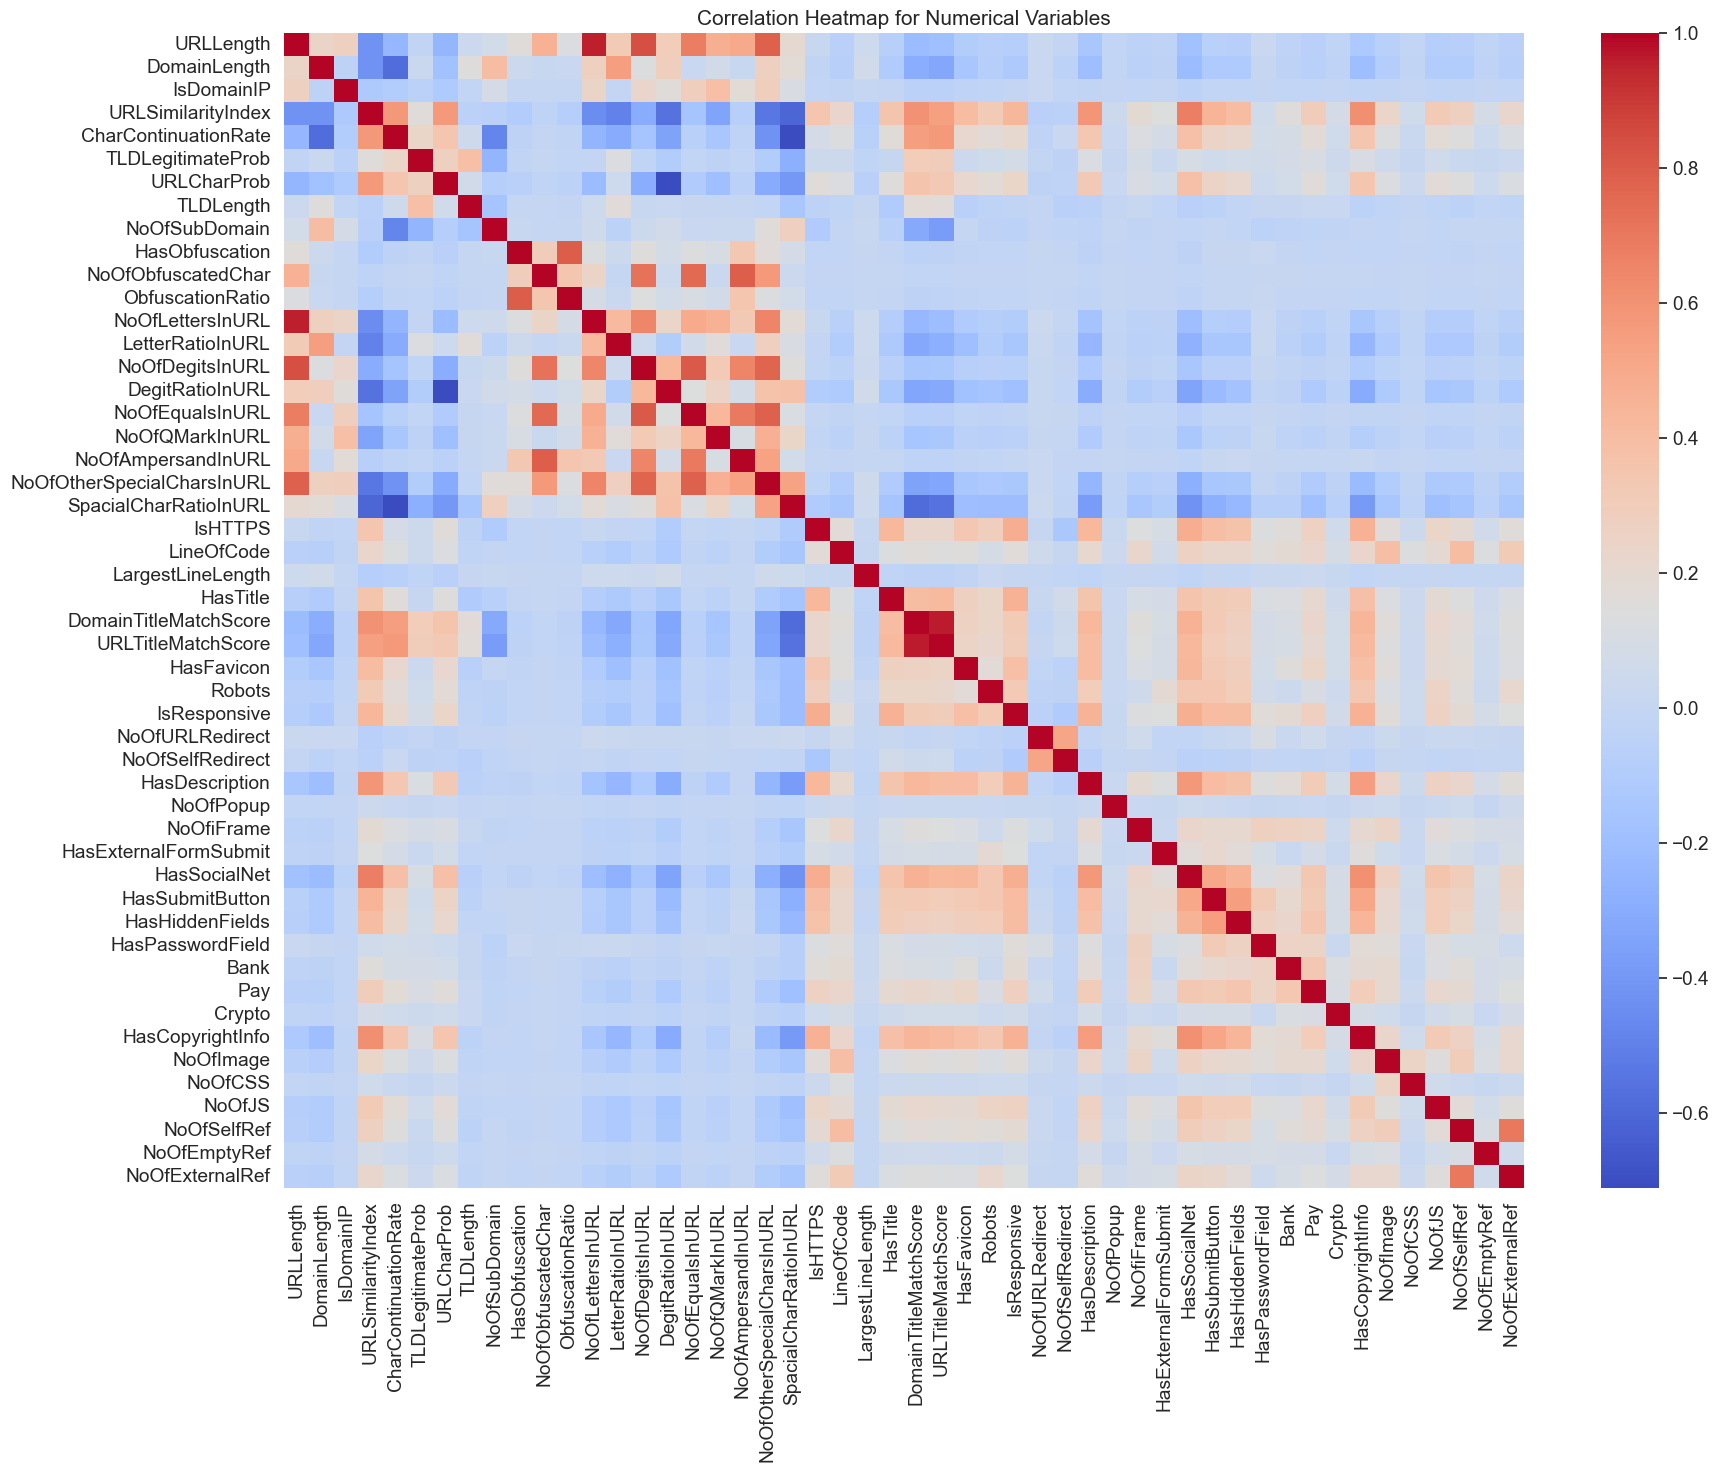

In [16]:
# Calculate correlation matrix for numerical variables
numerical_vars = X.select_dtypes('number')
corr_matrix = numerical_vars.corr()

# Plot heatmap of correlations for numerical variables
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

In [17]:
# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(to_drop)
XReduced = X.drop(columns = to_drop)

['ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'URLTitleMatchScore', 'NoOfExternalRef']


In [18]:
XReduced.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,1,0,0,1,34,20,28,119,0
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,0,0,1,50,9,8,39,0
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,0,0,1,10,2,7,42,2
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,0,0,1,1,1,3,27,15,22,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,0,1,1,0,1,244,15,34,72,1


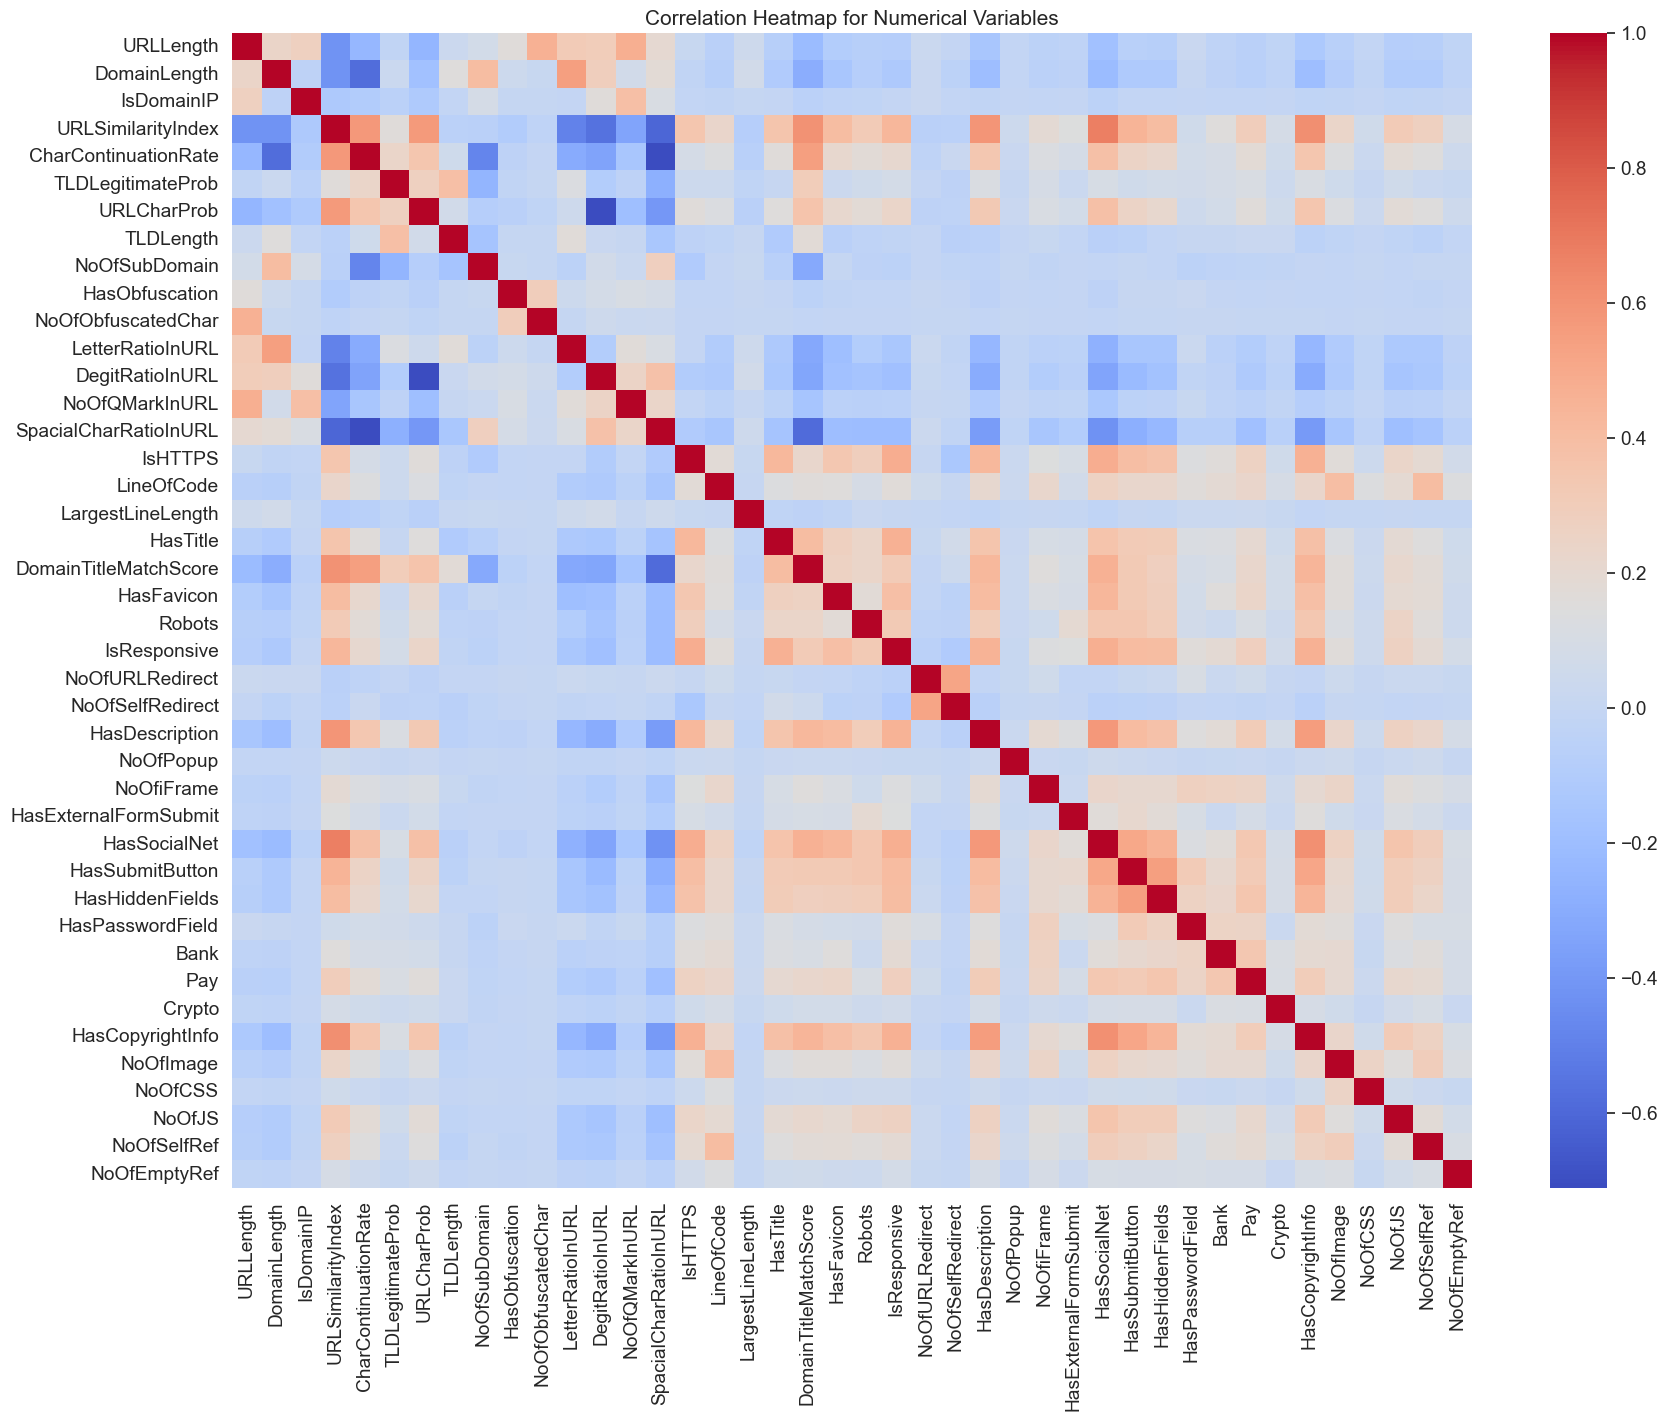

In [19]:
numerical_vars = XReduced.select_dtypes('number')

# Calculate correlation matrix for numerical variables
corr_matrix = numerical_vars.corr()

# Plot heatmap of correlations for numerical variables
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

In [20]:
XReduced.drop('TLD',axis=1,inplace=True)
X_updated = pd.merge(XReduced,TLD_encoded_df,left_index=True, right_index=True)
X_updated # contains encoded tld column

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Outliers removal

In [22]:
import pandas as pd

def replace_outliers(df):
    cleaned_df = df.copy()
    for column in df.select_dtypes(include='number').columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        
        # Replace the outliers
        cleaned_df.loc[cleaned_df[column] < lb, column] = lb
        cleaned_df.loc[cleaned_df[column] > ub, column] = ub
    
    return cleaned_df

# Example usage
cleaned_df = replace_outliers(X_updated)
df_cleaned_updated = cleaned_df.dropna()

print(df_cleaned_updated)

C:\Users\uzmap\AppData\Local\Temp\ipykernel_7992\952275499.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned_df.loc[cleaned_df[column] < lb, column] = lb
C:\Users\uzmap\AppData\Local\Temp\ipykernel_7992\952275499.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned_df.loc[cleaned_df[column] < lb, column] = lb
C:\Users\uzmap\AppData\Local\Temp\ipykernel_7992\952275499.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1870.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned_df.loc[cleaned_

        URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
0            31.0            24           0          100.000000   
1            23.0            16           0          100.000000   
2            29.0            22           0          100.000000   
3            26.0            19           0          100.000000   
4            33.0            26           0          100.000000   
...           ...           ...         ...                 ...   
235790       29.0            22           0          100.000000   
235791       28.0            21           0          100.000000   
235792       30.0            23           0          100.000000   
235793       50.5            36           0           28.157537   
235794       33.0            26           0          100.000000   

        CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0                   1.000000           0.522907     0.061933        3.0   
1                   0.666667           0.0326

#### Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df_cleaned_updated)
scaled_phishing_data=pd.DataFrame(scaled_data,columns=df_cleaned_updated.columns)
scaled_phishing_data.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,0.480000,0.62500,0.0,1.0,1.000000,1.000000,0.605576,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.266667,0.37500,0.0,1.0,0.583333,0.062440,0.363869,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.426667,0.56250,0.0,1.0,0.833333,0.054608,0.650833,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.346667,0.46875,0.0,1.0,1.000000,1.000000,0.516375,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.533333,0.68750,0.0,1.0,1.000000,0.152920,0.554213,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Model Training

In [26]:
#splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    scaled_phishing_data,
    y,
    test_size = 0.2,
    random_state = 7)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision tree Accuracy: {accuracy * 100:.2f}%")



Decision tree Accuracy: 99.99%


In [30]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")



Logistic Regression Accuracy: 99.94%


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy * 100:.2f}%")



K-Nearest Neighbors Accuracy: 99.55%


In [32]:
from sklearn.svm import SVC

# Initialize the SVM model
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Support Vector Machine Accuracy: {accuracy * 100:.2f}%")



Support Vector Machine Accuracy: 99.97%


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")



Random Forest Accuracy: 99.99%


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")



Gradient Boosting Accuracy: 99.99%
